# Model Presentation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../predictions/nonlinear/test_data.csv').set_index('X', drop=True).drop('Unnamed: 0', axis=1) 
data.index = pd.to_datetime(data.index).strftime('%Y-%m-%d %H')
water_sensors = data[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15']].copy()
p_1step = pd.read_csv('../predictions/nonlinear/1step2.csv').drop('Unnamed: 0', axis=1)
p_24step = pd.read_csv('../predictions/nonlinear/24step2.csv').drop('Unnamed: 0', axis=1)
p_1week = pd.read_csv('../predictions/nonlinear/1week2.csv').drop('Unnamed: 0', axis=1)
p_2week = pd.read_csv('../predictions/nonlinear/2week2.csv').drop('Unnamed: 0', axis=1)
sim = pd.read_csv('../predictions/norelu/sim3.csv').drop('Unnamed: 0', axis=1)


p1_1step_lin = pd.read_csv('../predictions/linear/1step_new.csv').drop('Unnamed: 0', axis=1)
p1_24step_lin = pd.read_csv('../predictions/linear/24step_new.csv').drop('Unnamed: 0', axis=1)
p1_sim_lin = pd.read_csv('../predictions/norelu/sim.csv').drop('Unnamed: 0', axis=1)
# p1_1week_lin = pd.read_csv('../predictions/linear/1week.csv').drop('Unnamed: 0', axis=1)

# p1_2week_lin = pd.read_csv('../predictions/linear/2week.csv').drop('Unnamed: 0', axis=1)
# sim_lin = pd.read_csv('../predictions/linear/sim.csv').drop('Unnamed: 0', axis=1)



p_1step.index = data.index
p_24step.index = data.index
p_1week.index = data.index

p_2week.index = data.index
sim.index = data.index

p1_1step_lin.index = data.index
p1_24step_lin.index = data.index
p1_sim_lin.index = data.index

FileNotFoundError: [Errno 2] No such file or directory: '../predictions/nonlinear/test_data.csv'

Text(0.5, 1.0, 'Storage temperature in Dronninglund 2017')

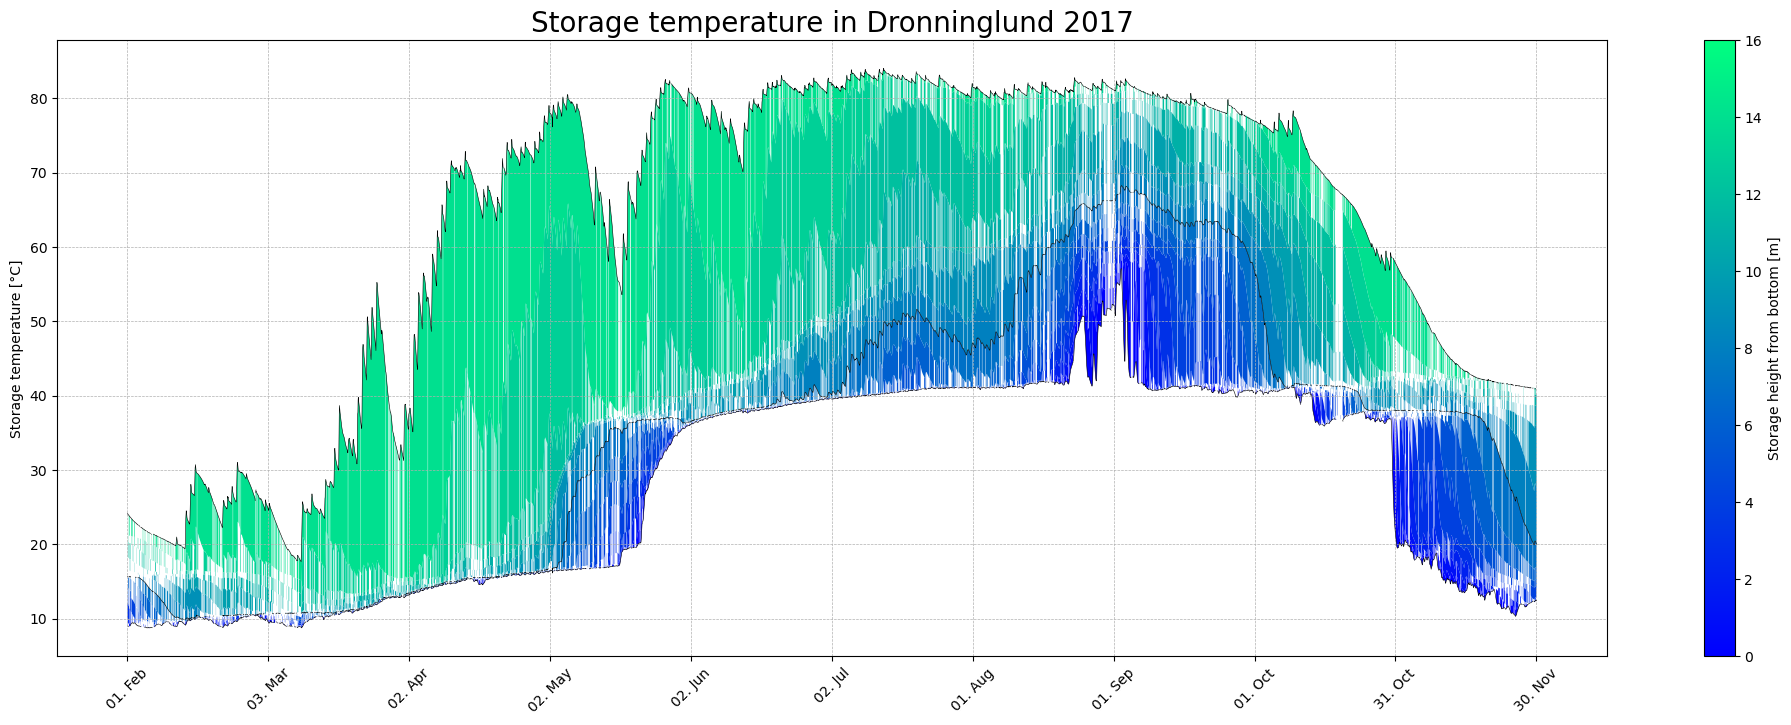

In [2]:
import matplotlib
import matplotlib.dates as mdates
df = pd.read_csv("../data/processed/dronninglund/water_sensors.csv")
df.set_index('Unnamed: 0', drop=True, inplace=True)
df = df.drop('t', axis=1)
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d %H:%M:%S')
df = df['2017-02':'2017-12']


cmap = matplotlib.colormaps['winter']
 # make a copy of the dataframe to use it for the plot
df_water_sensors = df.copy()
T = pd.to_datetime(df_water_sensors.index).strftime('%Y-%b') # convert the index to datetime
fig, ax = plt.subplots(1,1,figsize=(25,8))

# Plot color between two temperature sensors
for i in range(df_water_sensors.shape[1]-1):
    c1 = df_water_sensors.columns[i]
    c2 = df_water_sensors.columns[i+1]
    ax.fill_between(df_water_sensors.index, df_water_sensors[c2], df_water_sensors[c1],
                where=df_water_sensors[c2] >= df_water_sensors[c1],
                facecolor=cmap(i/len(df_water_sensors.columns))
                )
                


ax.plot(df_water_sensors[df_water_sensors.columns[0]], c='k', lw=0.4)
ax.plot(df_water_sensors[df_water_sensors.columns[int(df_water_sensors.shape[1]/2)]], c='k', lw=0.4)
ax.plot(df_water_sensors[df_water_sensors.columns[-1]], c='k', lw=0.4)

# Format y-label and set y-limit
ax.set_ylabel('Storage temperature [°C]')

cax, _ = matplotlib.colorbar.make_axes(ax) 
cb2 = matplotlib.colorbar.ColorbarBase(
cax, cmap=cmap, norm=plt.Normalize(0,16),label='Storage height from bottom [m]')


# Format x-axis labels and set x-limit
ax.set_xticks(df_water_sensors.index[::int(len(df_water_sensors.index)/10)])
ax.set_xticklabels(pd.to_datetime(df_water_sensors.index[::int(len(df_water_sensors.index)/10)]).strftime('%d. %b'), rotation=45);
ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

# Vlines mid august
# ax.axvline('2015-08-15', c='r', lw=0.5, ls='--')

# ax.axvline('2015-08-15 00:00:00', c='r', lw=1, ls='--')
# ax.axvline('2015-11-15 00:00:00', c='r', lw=1, ls='--')

# ax.axvline('2014-12-01 00:00:00', c='b', lw=1, ls='--')
# ax.axvline('2017-02-01 00:00:00', c='b', lw=1, ls='--')
ax.set_title('Storage temperature in Dronninglund 2017', fontsize=20)


In [ ]:
pd.to_datetime(df_water_sensors.index[::int(len(df_water_sensors.index)/10)]).strftime('%d. %b')


Index(['01. Feb', '03. Mar', '02. Apr', '02. May', '02. Jun', '02. Jul',
       '01. Aug', '01. Sep', '01. Oct', '31. Oct', '30. Nov'],
      dtype='object', name='Unnamed: 0')

$$dT_{15} = \frac{1}{V15}((T_{top,input} - T_{15})(\nu_1 + (T_{15}-T_{14}) \nu_2)F_{top,input} + (T_{15}-T_{14})*(\kappa + (\theta_1+\theta_2 \cdot T_{15}) \cdot F_{top,output})+(T_{ambient}-T_{15})\cdot \mu)dt + \sigma_T \cdot dB_t
$$

## Model

$$dT_k = \frac{dt}{V_k}(\kappa_{k,charge}(T_{k+1} - T_k) F_{charge} + \kappa_{k,discharge}(T_{k-1} - T_k)F_{discharge}) + dt(\frac{V_k}{V_k + V_{k+1}}\operatorname{Relu}(T_{k}-T_{k+1})-\frac{V_{k-1}}{V_k + V_{k-1}}\operatorname{Relu}(T_{k-1}-T_{k}))$$

## Nonlinear addition
Idea from logistic function $df/dx = f(x)(1-f(x))$

$$\frac{dt}{V_k}(\kappa_{k,flow}(T_{k+1}-T_k)(T_k-T_{k-1})F_{flow})$$


### Presenting the test data 2017

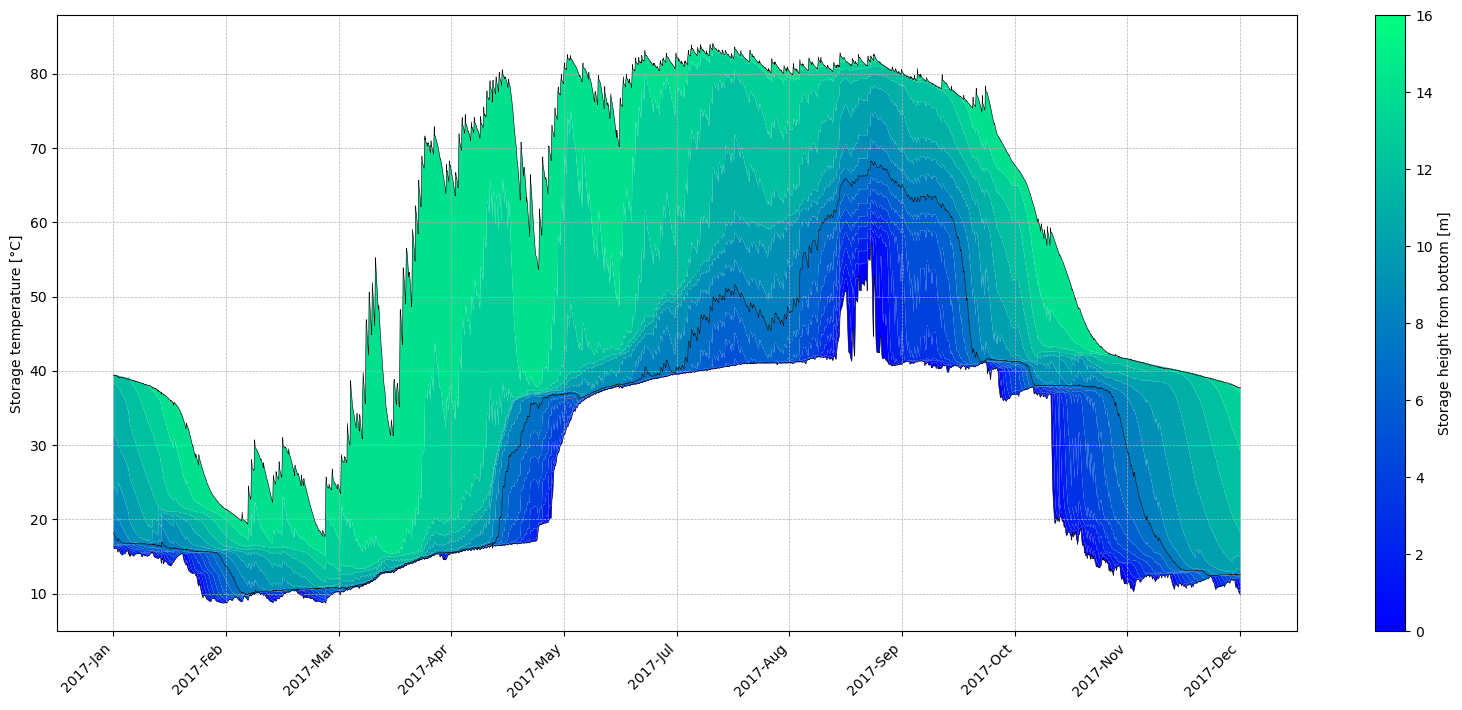

In [ ]:
import matplotlib
import matplotlib.dates as mdates
cmap = matplotlib.colormaps['winter']
 # make a copy of the dataframe to use it for the plot
df_water_sensors = water_sensors.copy()
T = pd.to_datetime(df_water_sensors.index).strftime('%Y-%b') # convert the index to datetime
fig, ax = plt.subplots(1,1,figsize=(20,8))

# Plot color between two temperature sensors
for i in range(df_water_sensors.shape[1]-1):
    c1 = df_water_sensors.columns[i]
    c2 = df_water_sensors.columns[i+1]
    ax.fill_between(df_water_sensors.index, df_water_sensors[c2], df_water_sensors[c1],
                where=df_water_sensors[c2] >= df_water_sensors[c1],
                facecolor=cmap(i/len(df_water_sensors.columns))
                )
                


ax.plot(df_water_sensors[df_water_sensors.columns[0]], c='k', lw=0.4)
ax.plot(df_water_sensors[df_water_sensors.columns[int(df_water_sensors.shape[1]/2)]], c='k', lw=0.4)
ax.plot(df_water_sensors[df_water_sensors.columns[-1]], c='k', lw=0.4)

# Format y-label and set y-limit
ax.set_ylabel('Storage temperature [°C]')

cax, _ = matplotlib.colorbar.make_axes(ax) 
cb2 = matplotlib.colorbar.ColorbarBase(
cax, cmap=cmap, norm=plt.Normalize(0,16),label='Storage height from bottom [m]')


# Format x-axis labels and set x-limit
ax.set_xticks(df_water_sensors.index[::int(len(df_water_sensors.index)/10)])
ax.set_xticklabels(T[::int(len(df_water_sensors.index)/10)], rotation=45, ha='right');
ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);


## Model



### Predictions


In [ ]:
p = [water_sensors, p_1step,p1_1step_lin, p_24step,p1_24step_lin, p_1week, p_2week, sim, p1_sim_lin]
titles = ['True', '1 step ahead', '1 step ahead linear',  '24 steps ahead','24 steps ahead linear', '1 week ahead', '2 weeks ahead', 'Simulation', 'Simulation linear']

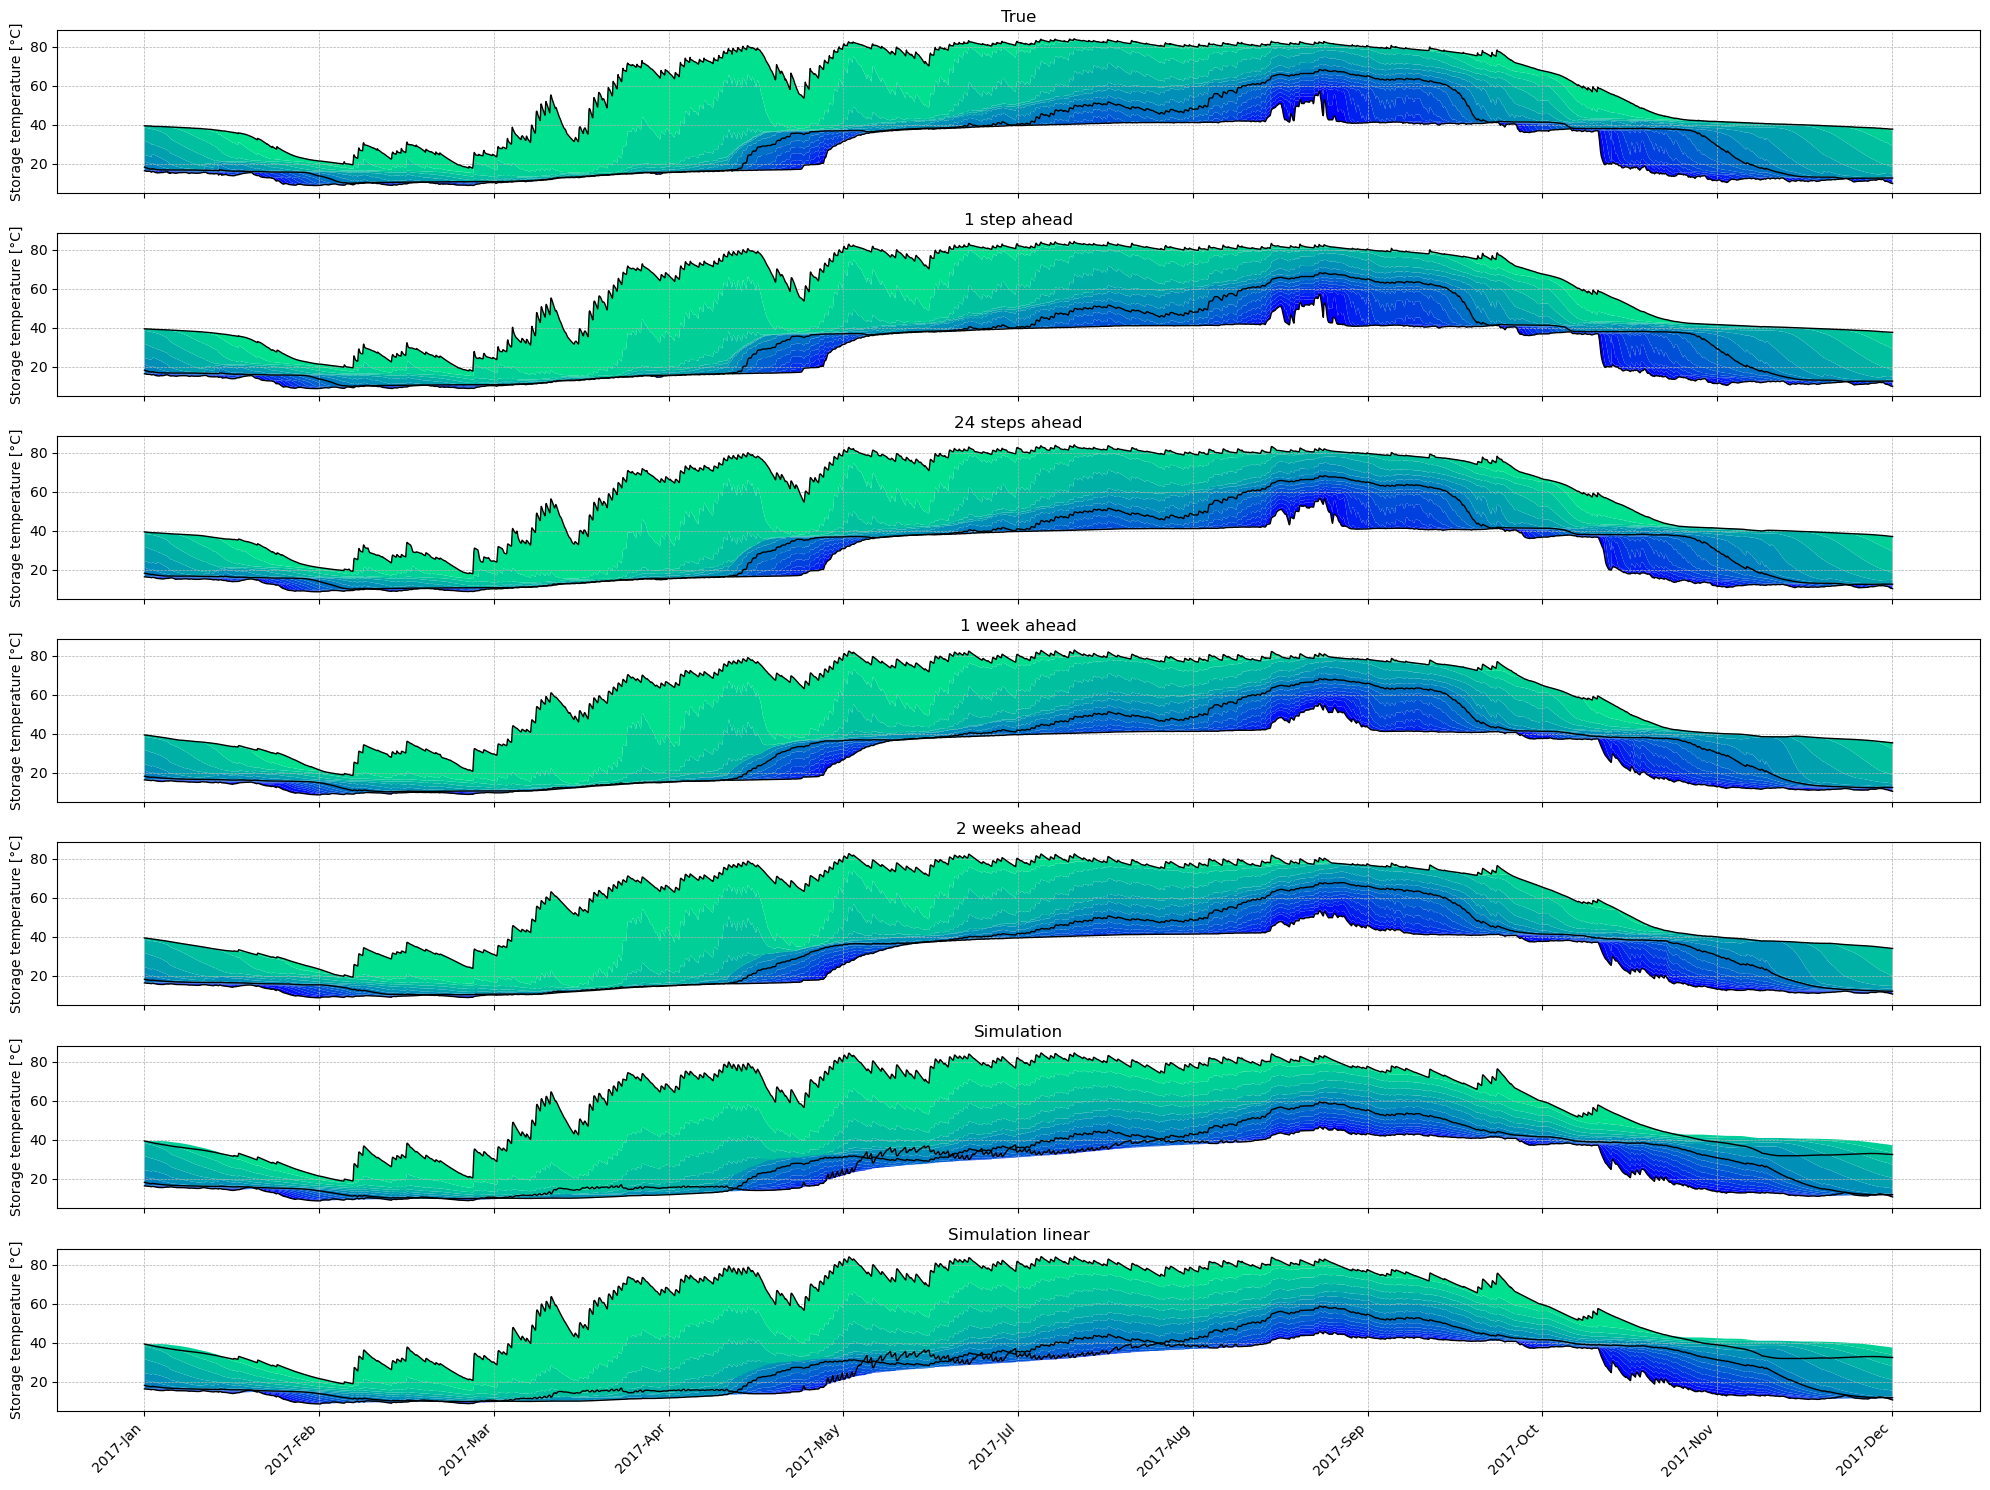

In [ ]:
fig, ax = plt.subplots(7,1,figsize=(20,15),sharex=True, sharey=True)
K = [0,1,3,5,6,7,8]
for j in range(7):
    k = K[j]
    df_water_sensors = p[k].copy()
    T = pd.to_datetime(df_water_sensors.index).strftime('%Y-%b') # convert the index to datetime

    # Plot color between two temperature sensors
    for i in range(df_water_sensors.shape[1]-1):
        c1 = df_water_sensors.columns[i]
        c2 = df_water_sensors.columns[i+1]
        ax[j].fill_between(df_water_sensors.index, df_water_sensors[c2], df_water_sensors[c1],
                    where=df_water_sensors[c2] >= df_water_sensors[c1],
                    facecolor=cmap(i/len(df_water_sensors.columns))
                    )
                    
    ax[j].plot(df_water_sensors[df_water_sensors.columns[0]], c='k', lw=1)
    ax[j].plot(df_water_sensors[df_water_sensors.columns[int(df_water_sensors.shape[1]/2)]], c='k', lw=1)
    ax[j].plot(df_water_sensors[df_water_sensors.columns[-1]], c='k', lw=1)


    # Format y-label and set y-limit
    ax[j].set_ylabel('Storage temperature [°C]')

    # Format x-axis labels and set x-limit
    ax[j].set_xticks(df_water_sensors.index[::int(len(df_water_sensors.index)/10)])
    ax[j].set_xticklabels(T[::int(len(df_water_sensors.index)/10)], rotation=45, ha='right');
    ax[j].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

    ax[j].set_title(titles[k])

fig.tight_layout()

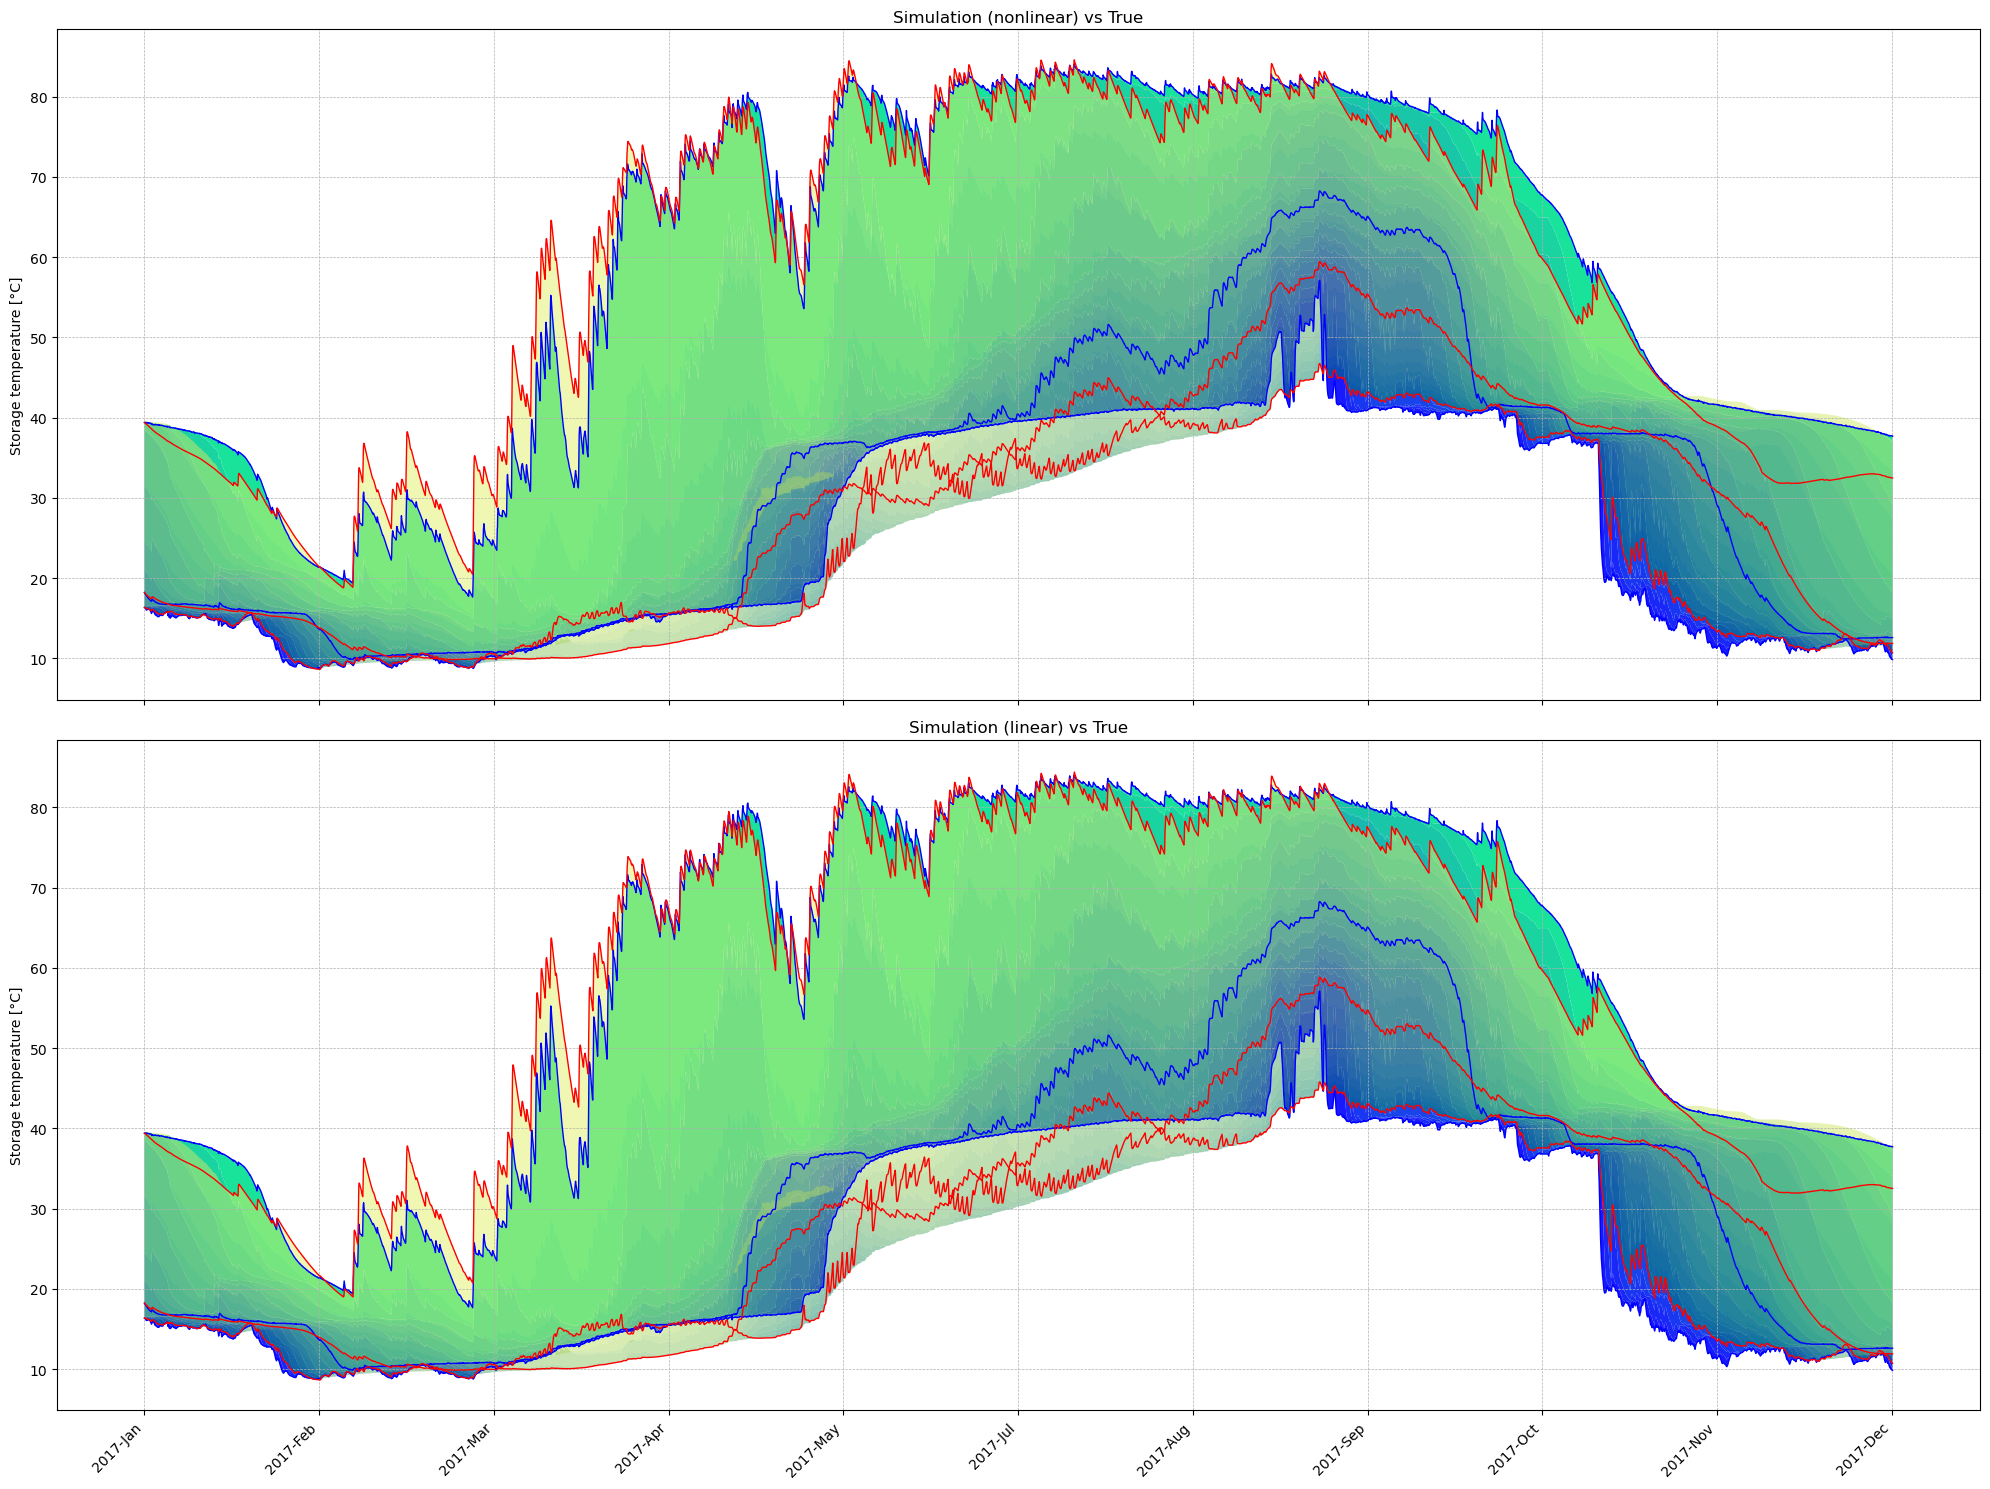

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,15),sharex=True, sharey=True)
K = [0,7]
c = ['b','r']
cmaps = [matplotlib.colormaps['winter'], matplotlib.colormaps['summer']]
alpha = [0.9, 0.5]
for j in range(2):
    k = K[j]
    cmap = cmaps[j]
    df_water_sensors = p[k].copy()
    T = pd.to_datetime(df_water_sensors.index).strftime('%Y-%b') # convert the index to datetime

    # Plot color between two temperature sensors
    for i in range(df_water_sensors.shape[1]-1):
        c1 = df_water_sensors.columns[i]
        c2 = df_water_sensors.columns[i+1]
        ax[0].fill_between(df_water_sensors.index, df_water_sensors[c2], df_water_sensors[c1],
                    where=df_water_sensors[c2] >= df_water_sensors[c1],
                    facecolor=cmap(i/len(df_water_sensors.columns)),
                    alpha = alpha[j]
                    )
                    
    ax[0].plot(df_water_sensors[df_water_sensors.columns[0]], c=c[j], lw=1)
    ax[0].plot(df_water_sensors[df_water_sensors.columns[int(df_water_sensors.shape[1]/2)]], c=c[j], lw=1)
    ax[0].plot(df_water_sensors[df_water_sensors.columns[-1]], c=c[j], lw=1)


    # Format y-label and set y-limit
    ax[0].set_ylabel('Storage temperature [°C]')

    # Format x-axis labels and set x-limit
    ax[0].set_xticks(df_water_sensors.index[::int(len(df_water_sensors.index)/10)])
    ax[0].set_xticklabels(T[::int(len(df_water_sensors.index)/10)], rotation=45, ha='right');
    ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

    ax[0].set_title('Simulation (nonlinear) vs True')

K = [0,8]
c = ['b','r']
cmaps = [matplotlib.colormaps['winter'], matplotlib.colormaps['summer']]
alpha = [0.9, 0.5]
for j in range(2):
    k = K[j]
    cmap = cmaps[j]
    df_water_sensors = p[k].copy()
    T = pd.to_datetime(df_water_sensors.index).strftime('%Y-%b') # convert the index to datetime

    # Plot color between two temperature sensors
    for i in range(df_water_sensors.shape[1]-1):
        c1 = df_water_sensors.columns[i]
        c2 = df_water_sensors.columns[i+1]
        ax[1].fill_between(df_water_sensors.index, df_water_sensors[c2], df_water_sensors[c1],
                    where=df_water_sensors[c2] >= df_water_sensors[c1],
                    facecolor=cmap(i/len(df_water_sensors.columns)),
                    alpha = alpha[j]
                    )
                    
    ax[1].plot(df_water_sensors[df_water_sensors.columns[0]], c=c[j], lw=1)
    ax[1].plot(df_water_sensors[df_water_sensors.columns[int(df_water_sensors.shape[1]/2)]], c=c[j], lw=1)
    ax[1].plot(df_water_sensors[df_water_sensors.columns[-1]], c=c[j], lw=1)


    # Format y-label and set y-limit
    ax[1].set_ylabel('Storage temperature [°C]')

    # Format x-axis labels and set x-limit
    ax[1].set_xticks(df_water_sensors.index[::int(len(df_water_sensors.index)/10)])
    ax[1].set_xticklabels(T[::int(len(df_water_sensors.index)/10)], rotation=45, ha='right');
    ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

    ax[1].set_title('Simulation (linear) vs True')
fig.tight_layout()

In [ ]:
res_1step = p_1step - water_sensors
res_24step = p_24step - water_sensors
res_1week = p_1week - water_sensors
res_2week = p_2week - water_sensors
res_sim = sim - water_sensors
res_1step_lin = p1_1step_lin - water_sensors
res_24step_lin = p1_24step_lin - water_sensors
res_sim_lin = p1_sim_lin - water_sensors
res = [res_1step, res_1step_lin, res_24step,res_24step_lin, res_1week, res_2week,res_sim, res_sim_lin]
titles = ['1 step ahead', '1 step ahead linear',  '24 steps ahead','24 steps ahead linear', '1 week ahead', '2 weeks ahead', 'Simulation', 'Simulation linear']

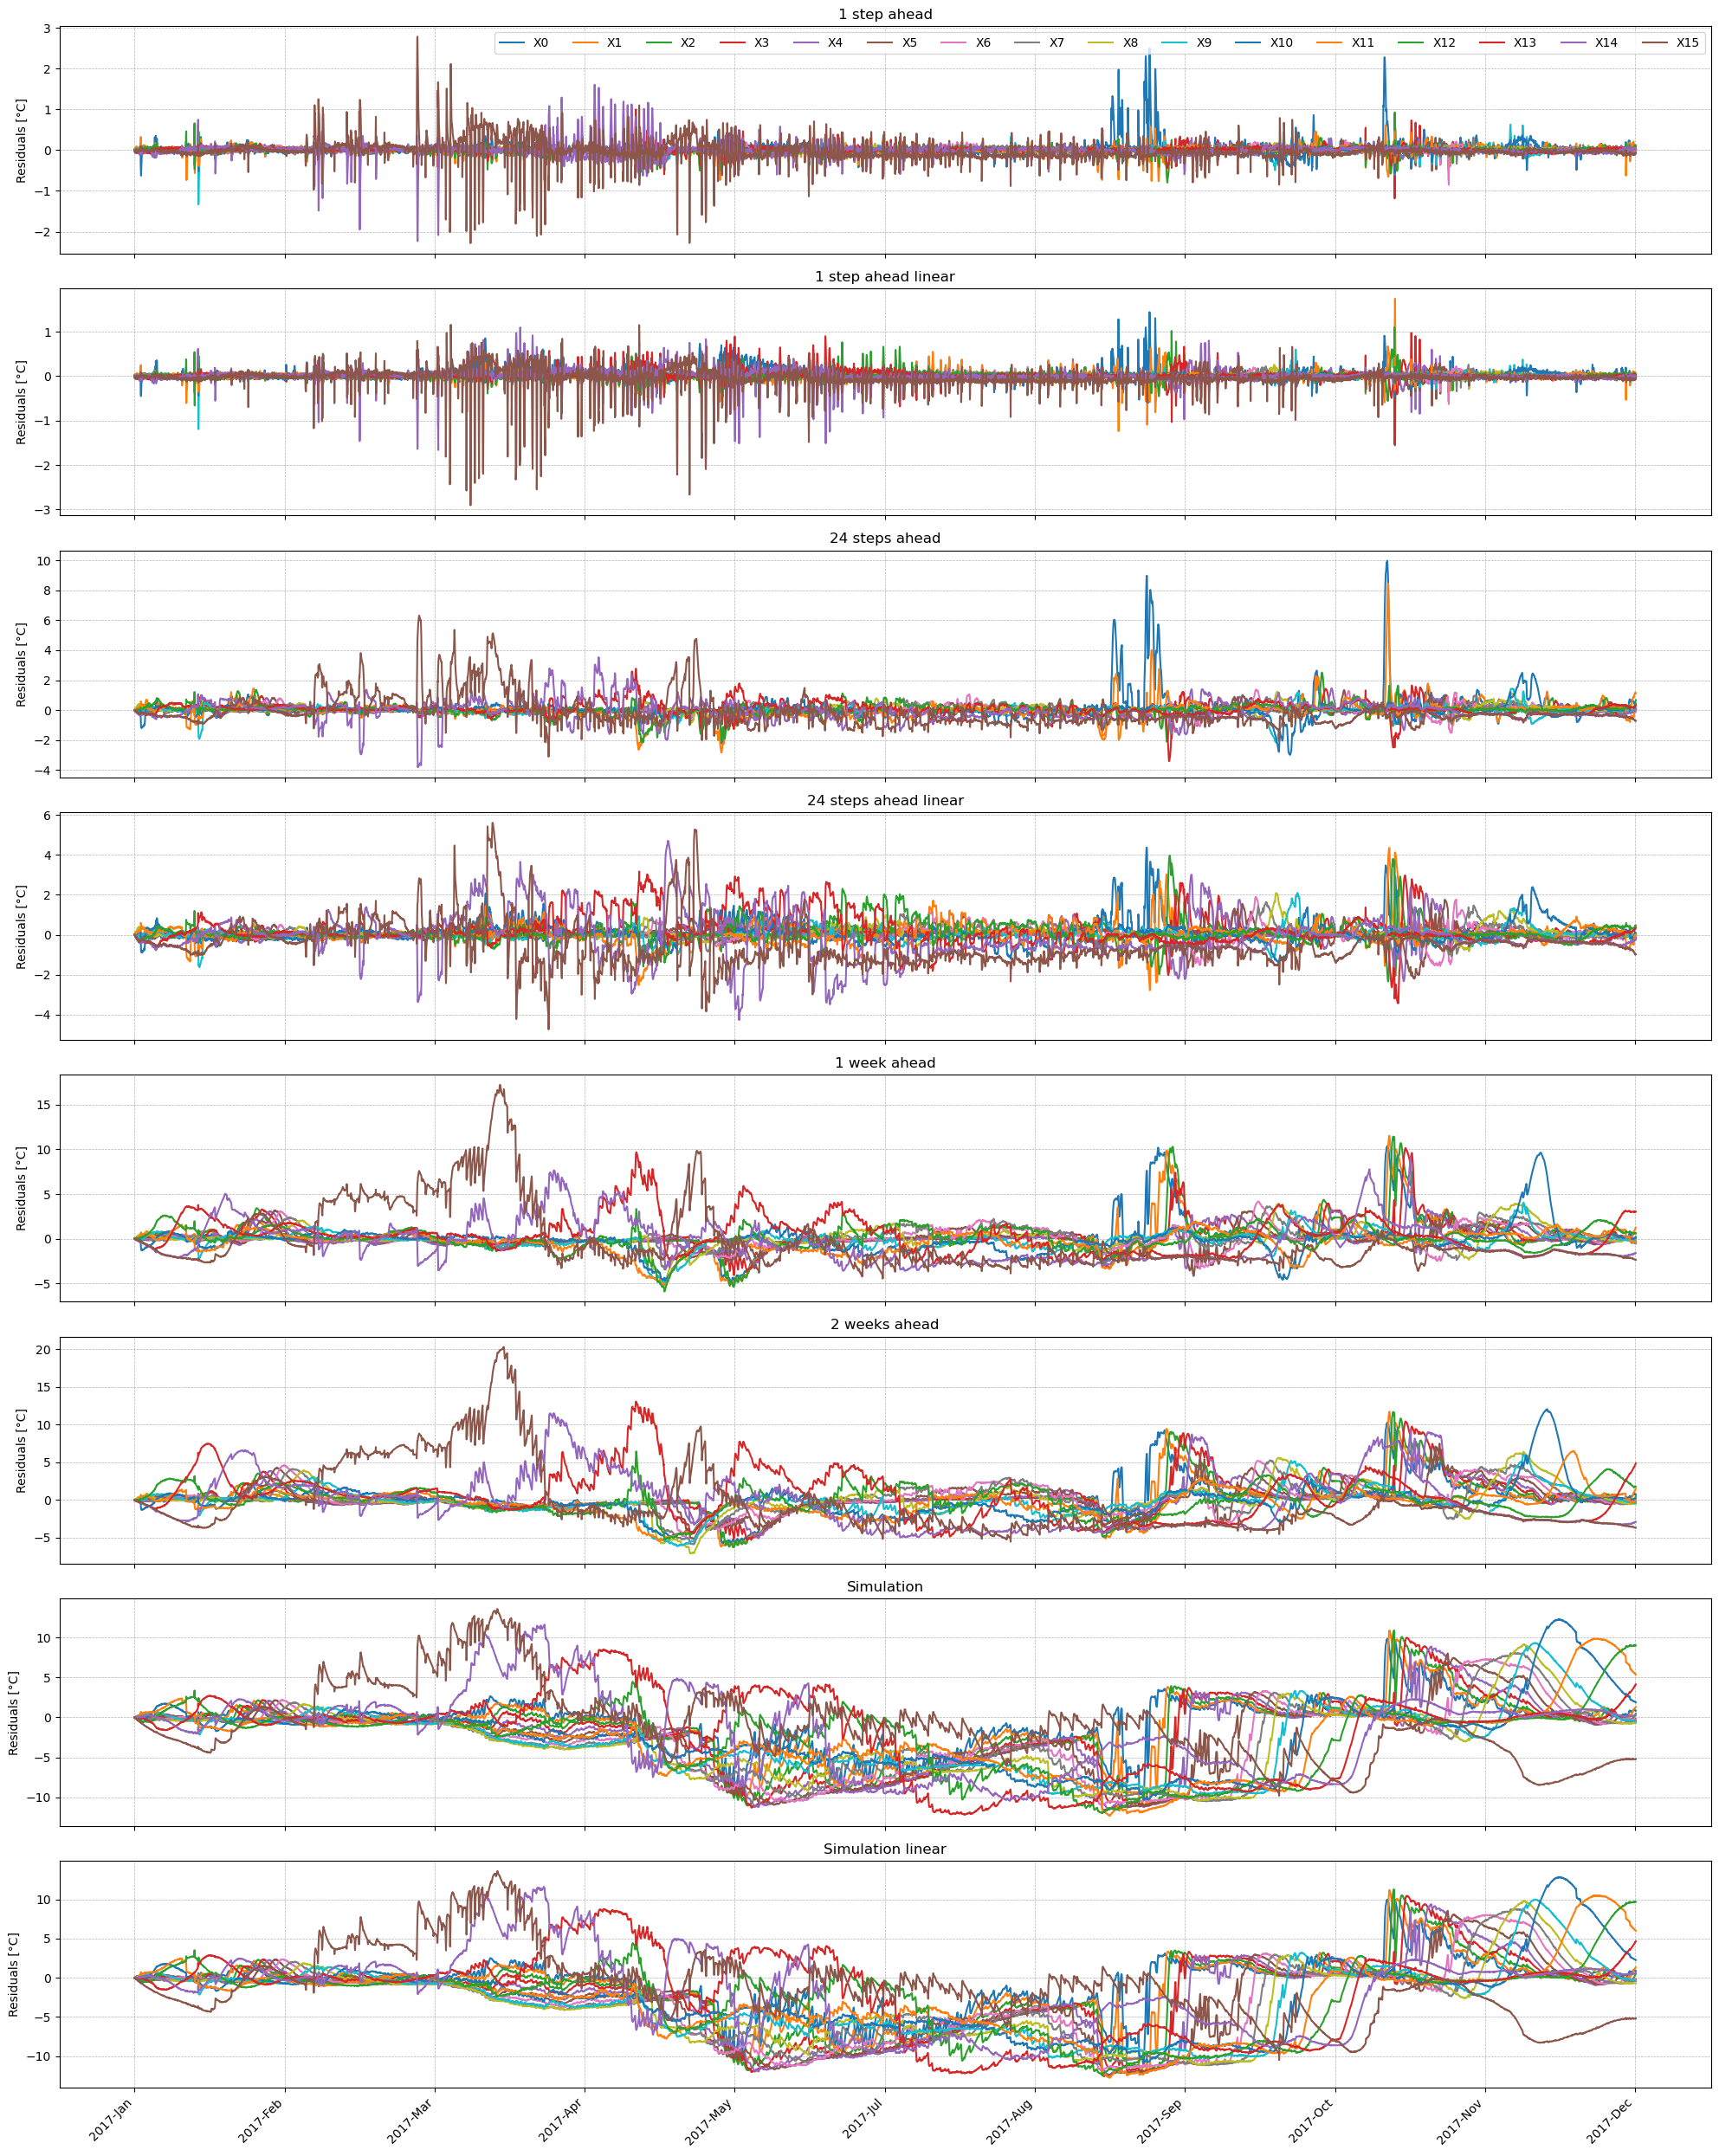

In [ ]:
fig, ax = plt.subplots(8,1,figsize=(20,25), sharex=True)
for i in range(8):
    ax[i].plot(res[i], label=water_sensors.columns)
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Residuals [°C]')
    ax[i].set_xticks(df_water_sensors.index[::int(len(df_water_sensors.index)/10)])
    ax[i].set_xticklabels(T[::int(len(df_water_sensors.index)/10)], rotation=45, ha='right');
    ax[i].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

ax[0].legend(loc='upper right', ncol=16)
plt.tight_layout()



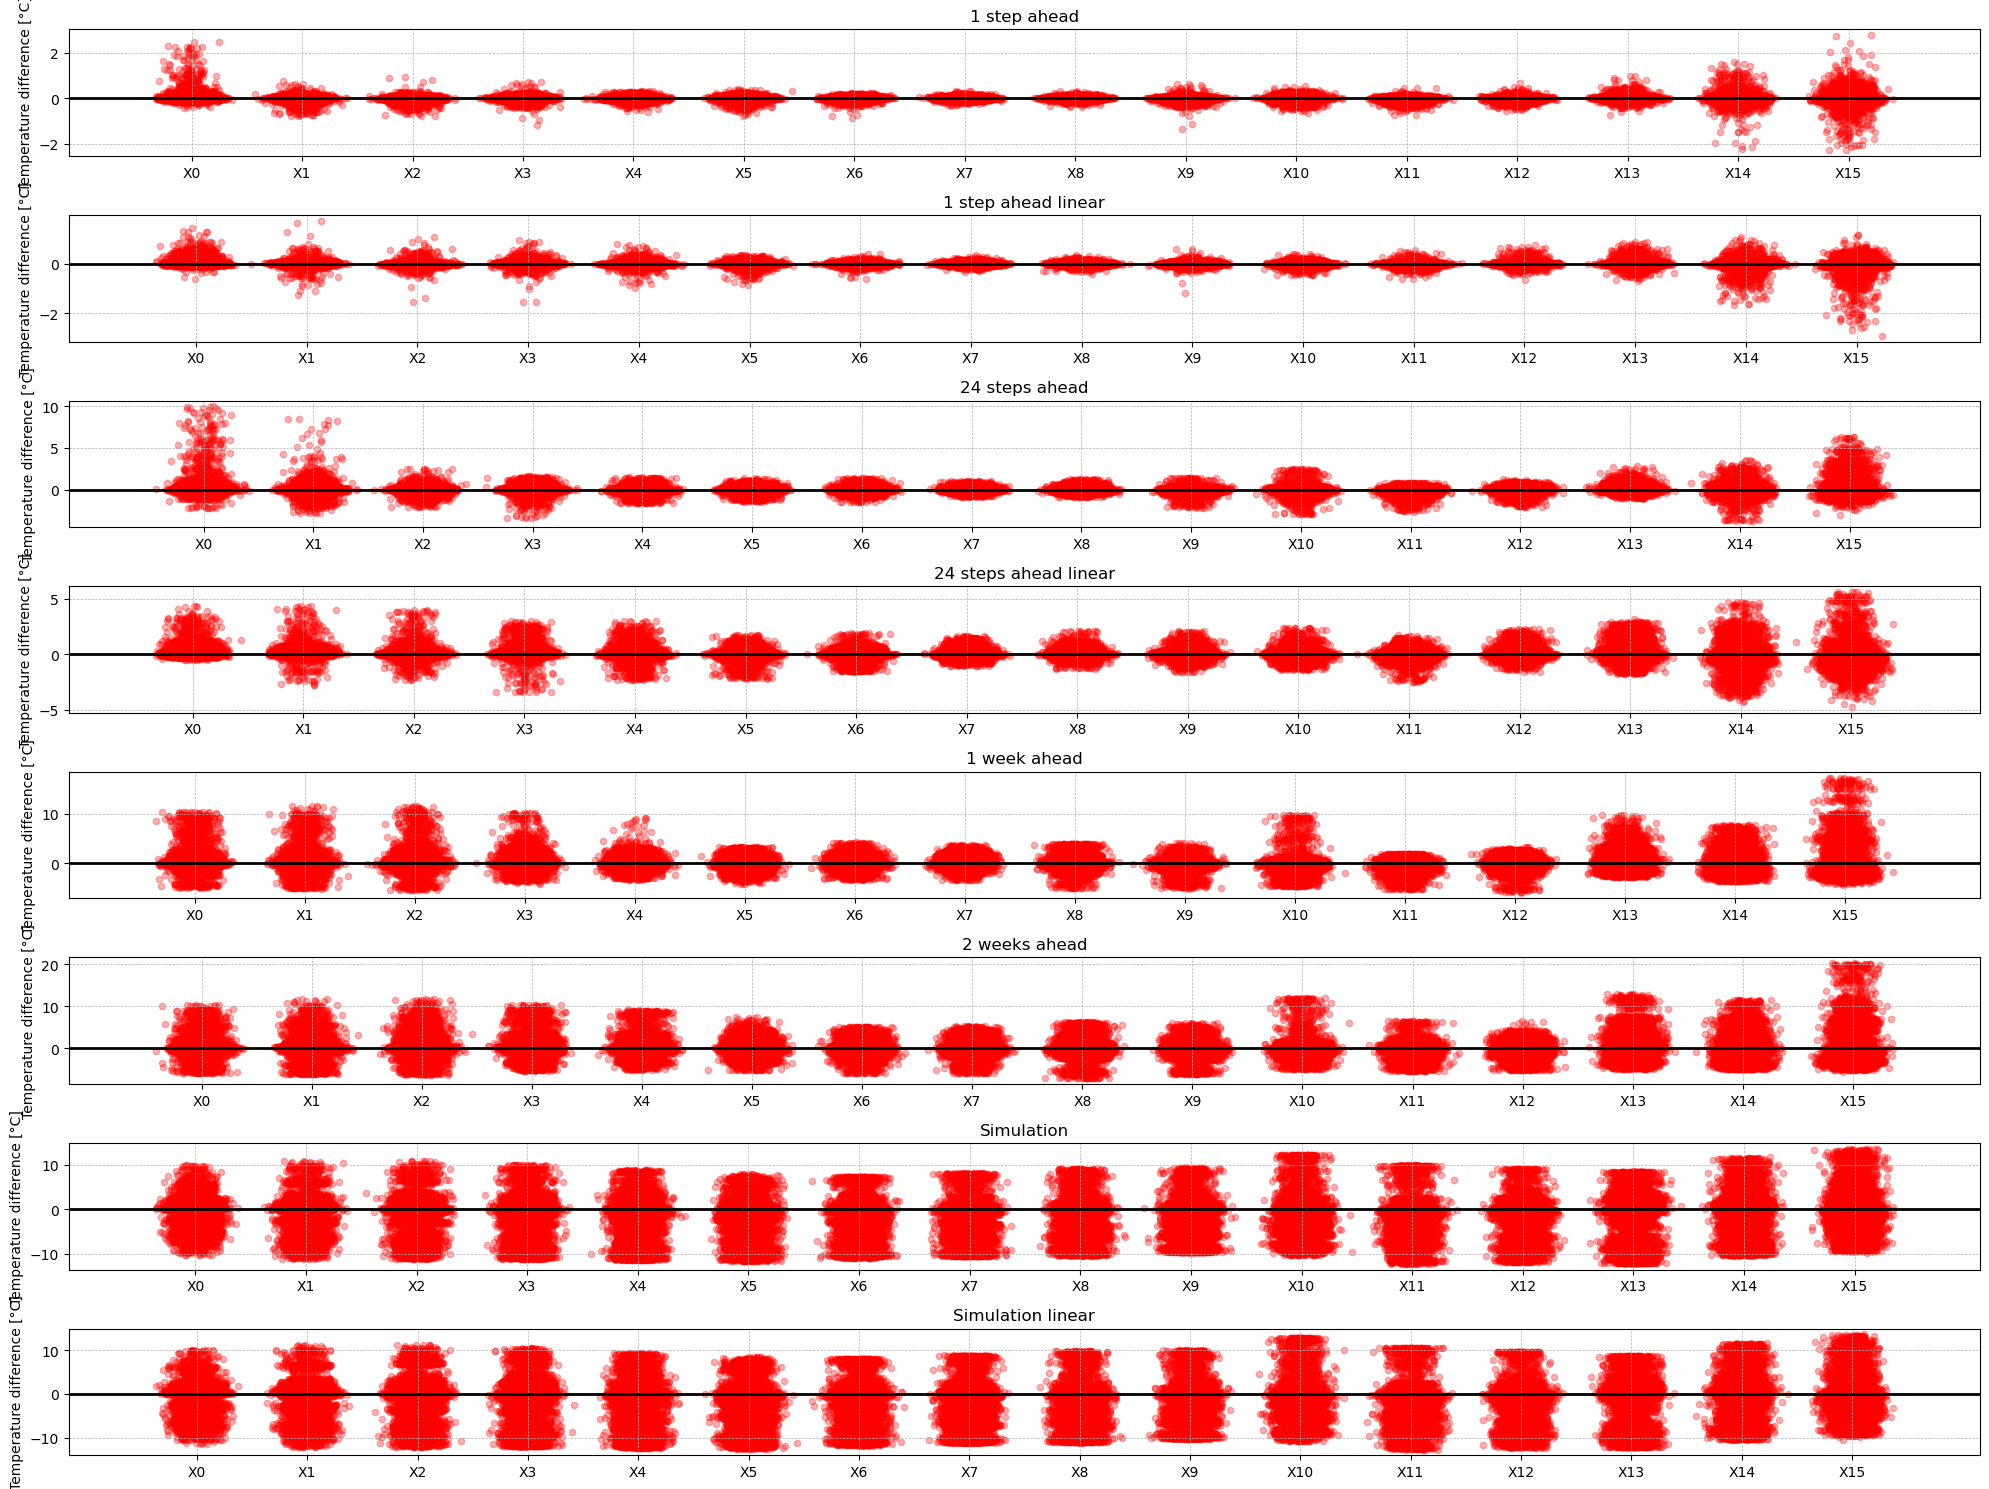

In [ ]:
fig, ax = plt.subplots(8,1,figsize=(20,15), sharey=False)
for j in range(8):
    for i, r in enumerate(res[j].values.T):
        ax[j].scatter(i + np.random.randn(len(r))*0.1, r, c='r', s=20,alpha = 0.3)
    ax[j].set_xticks(np.arange(len(res[j].columns)))
    ax[j].set_xticklabels(res[j].columns);
    ax[j].grid(True, linestyle='--', linewidth=0.5)
    ax[j].set_ylabel('Temperature difference [°C]')
    ax[j].set_title(titles[j])
    ax[j].axhline(0, color='black', lw=2)


fig.tight_layout()

### KPIs


In [ ]:
def density_water(T):
    '''Density (rho) of water in kg/m^3 based on fluid temperature (T) nearest the flow meter in degrees Celsius'''

    rho = (999.85+5.332*(10**-2)*T-7.564*(10**-3)*(T**2)+4.323*(10**-5)*(T**3)-1.673*(10**-7)*(T**4)+2.447*(10**-10)*(T**5))
    return(rho)

def specific_heat_water(T):
    '''Specific heat (cp) of water in J/(kg K) based on mean fluid temperature (T) in degrees Celsius'''
    cp = (4.2184-2.8218*(10**-3)*T+7.3478*(10**-5)*(T**2)-9.4712*(10**-7)*(T**3)+7.2869*(10**-9)*(T**4)-2.8098*(10**-11)*(T**5)
          +4.4008*(10**-14)*(T**6))*1000
    return(cp)


def logistic(x, L, k, x0, b):
    '''Logistic function to fit the data'''
    return L / (1 + np.exp((x0-x) / k)) + b

a = 90.4 # side length of top surface
layer_height = 1 # water layer height

volume_per_layer = []
area_per_layer = [a**2]
side_area_per_layer = []
centroids = []
for _ in range(1, 17):
        
    b = a - 4 # the slope is 1:2 thus giving 1 m length at each side
    layer_volume = layer_height / 3 *(a**2 + a*b + b**2)
    side_area = 1/2 * (a + b) * 4
    volume_per_layer.append(layer_volume)
    area_per_layer.append(b**2)
    side_area_per_layer.append(side_area)
    centroids.append((a**2+2*(a*b)+3*b**2)/(2*(2*a**2+2*a*b+2*b**2)))
    a = b

volume_per_layer = pd.Series(volume_per_layer).round(0)
volume_per_layer = volume_per_layer[::-1].reset_index(drop=True)

area_per_layer = pd.Series(area_per_layer)
area_per_layer = area_per_layer[::-1].reset_index(drop=True)

side_area_per_layer = pd.Series(side_area_per_layer).round(0)
side_area_per_layer = side_area_per_layer[::-1].reset_index(drop=True)


centroids = pd.Series(centroids)
centroids = centroids[::-1].reset_index(drop=True)
centroids = centroids + np.arange(0,16)

def stratification_coefficient(T):
    t = T.values
    
    m = density_water(t) * volume_per_layer.values
    t_mean = T.mean(axis =1).values.reshape(-1,1)

    m_total = m.sum(axis = 1)
    
    strC = (m*(t - t_mean)**2).sum(axis=1)/m_total
    strC = pd.Series(strC)
    strC.index = T.index
    return strC


In [ ]:
str_data = stratification_coefficient(water_sensors)
str_data_1step = stratification_coefficient(p_1step)
str_data_24step = stratification_coefficient(p_24step)
str_data_1week = stratification_coefficient(p_1week)
str_data_2week = stratification_coefficient(p_2week)
str_data_sim = stratification_coefficient(sim)
str_data_lin = stratification_coefficient(p1_sim_lin)


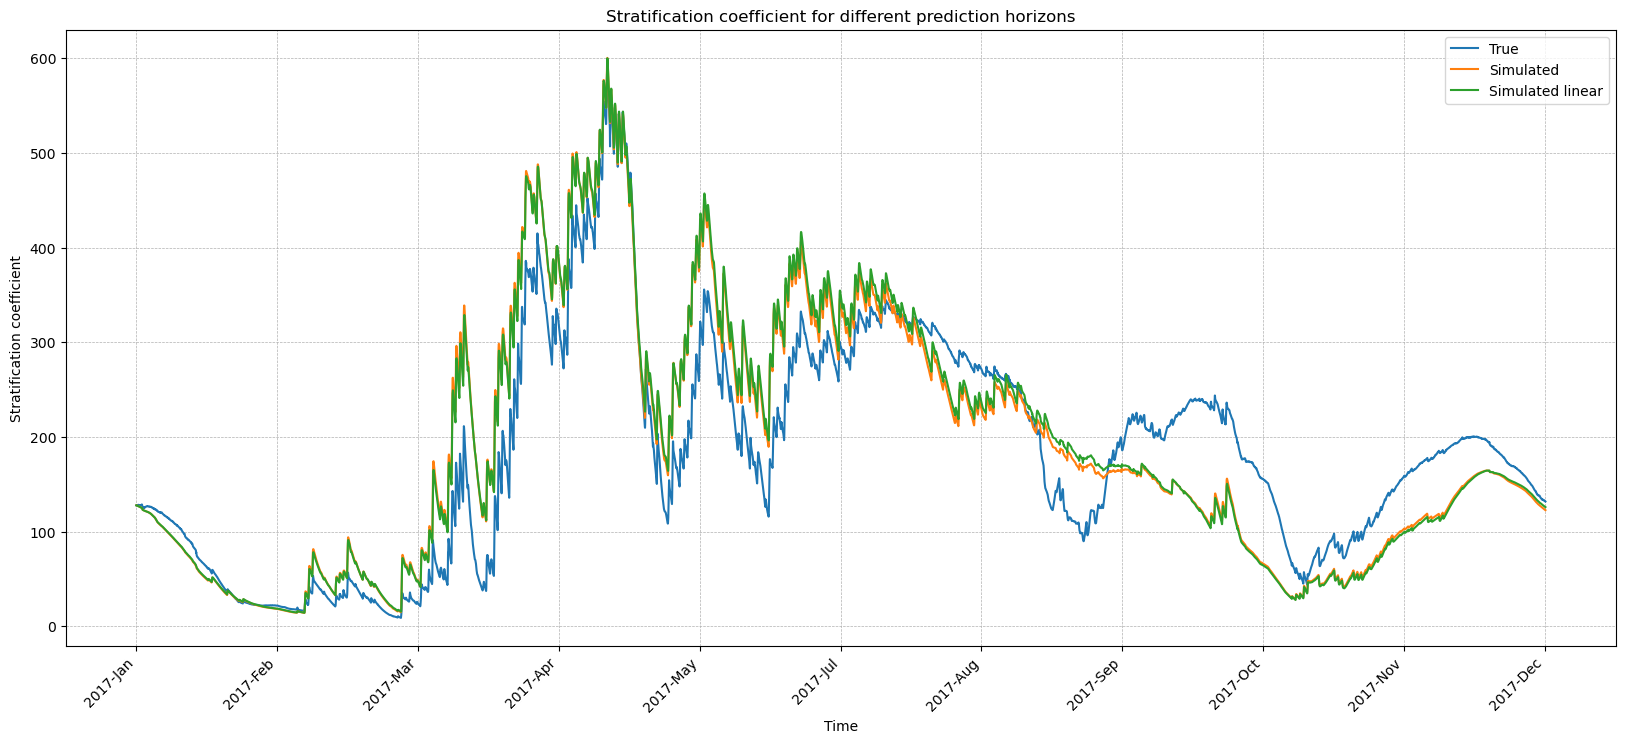

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
str_data.plot(ax=ax, label='True')
# str_data_1step.plot(ax=ax, label='1 step ahead')
# str_data_24step.plot(ax=ax, label='24 steps ahead')
# str_data_1week.plot(ax=ax, label='1 week ahead')
# str_data_2week.plot(ax=ax, label='2 weeks ahead')
str_data_sim.plot(ax=ax, label='Simulated')
str_data_lin.plot(ax=ax, label='Simulated linear')

ax.legend()
ax.set_ylabel('Stratification coefficient')
ax.set_xlabel('Time')
ax.set_title('Stratification coefficient for different prediction horizons')
ax.set_xticks(np.arange(len(str_data.index))[::int(len(str_data.index)/10)])
ax.set_xticklabels(T[::int(len(str_data.index)/10)], rotation=45, ha='right');
ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

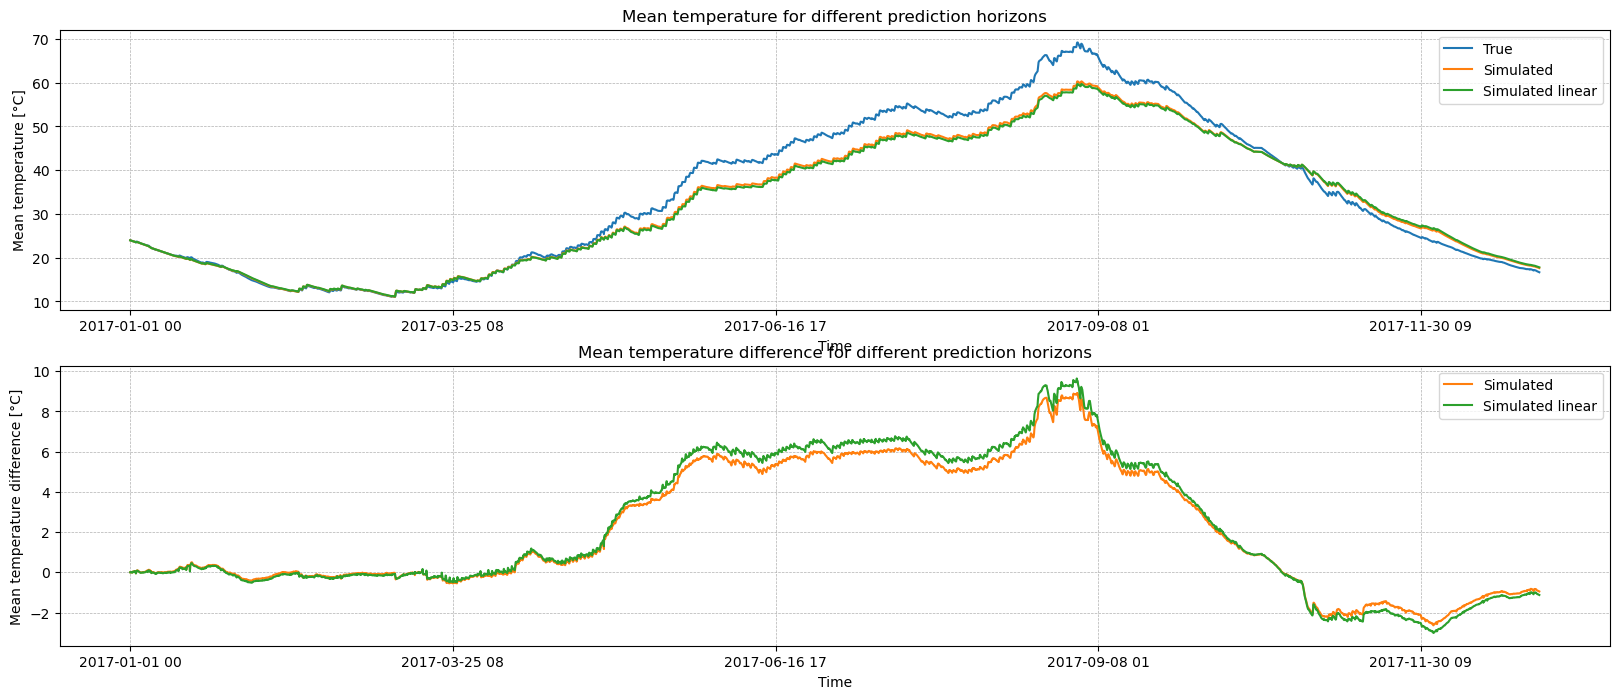

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,8))
water_sensors.mean(axis=1).plot(ax=ax[0], label='True')
# p_1step.mean(axis=1).plot(ax=ax, label='1 step ahead')
# p_24step.mean(axis=1).plot(ax=ax, label='24 steps ahead')
# p_1week.mean(axis=1).plot(ax=ax, label='1 week ahead')
# p_2week.mean(axis=1).plot(ax=ax, label='2 weeks ahead')
sim.mean(axis=1).plot(ax=ax[0], label='Simulated')
p1_sim_lin.mean(axis=1).plot(ax=ax[0], label='Simulated linear')

ax[0].legend()
ax[0].set_ylabel('Mean temperature [°C]')
ax[0].set_xlabel('Time')
ax[0].set_title('Mean temperature for different prediction horizons')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);



(water_sensors.mean(axis=1) - sim.mean(axis=1)).plot(ax=ax[1], label='Simulated', color='C1')
(water_sensors.mean(axis=1) - p1_sim_lin.mean(axis=1)).plot(ax=ax[1], label='Simulated linear', color='C2')
ax[1].legend()
ax[1].set_ylabel('Mean temperature difference [°C]')
ax[1].set_xlabel('Time')
ax[1].set_title('Mean temperature difference for different prediction horizons')
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

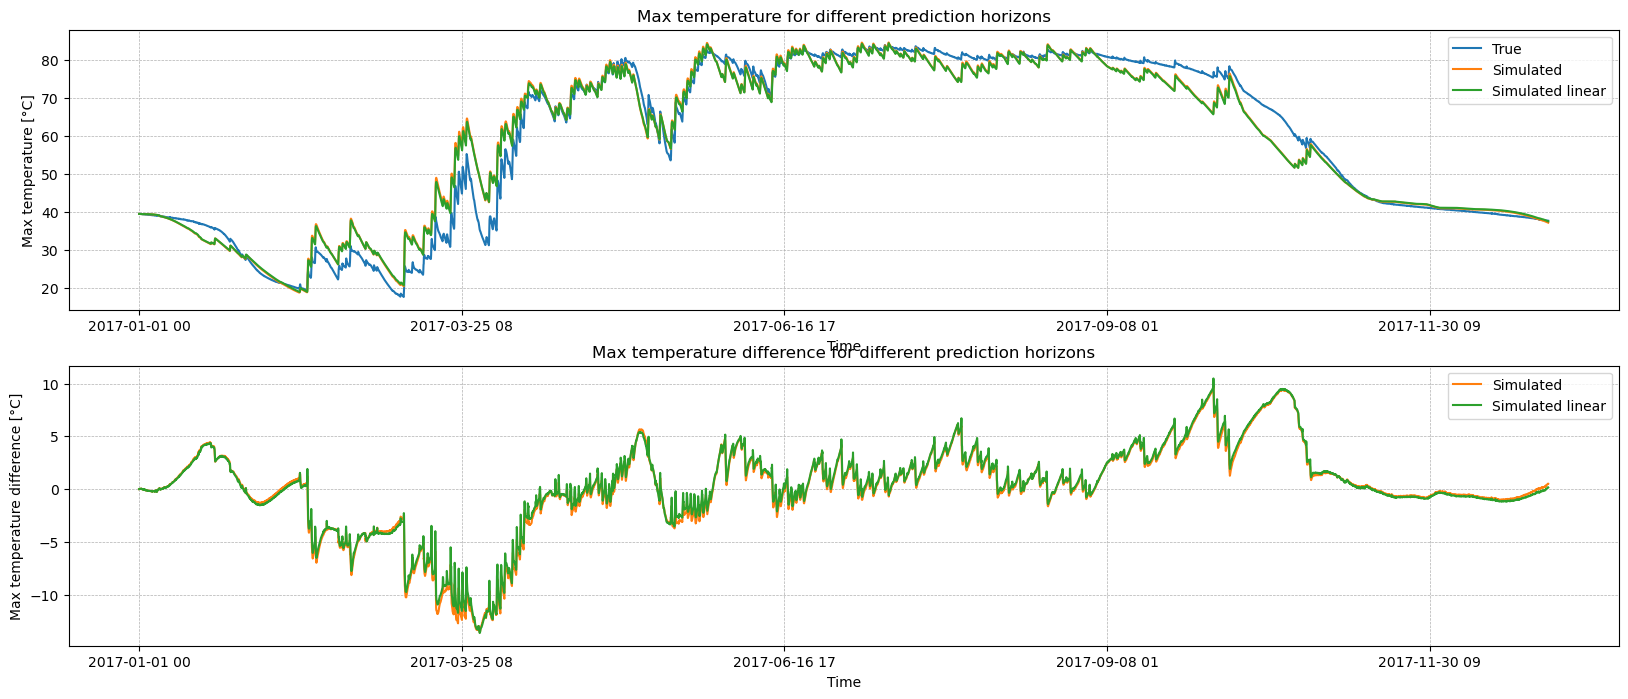

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,8))
water_sensors.max(axis=1).plot(ax=ax[0], label='True')
# p_1step.max(axis=1).plot(ax=ax, label='1 step ahead')
# p_24step.max(axis=1).plot(ax=ax, label='24 steps ahead')
# p_1week.max(axis=1).plot(ax=ax, label='1 week ahead')
# p_2week.max(axis=1).plot(ax=ax, label='2 weeks ahead')
sim.max(axis=1).plot(ax=ax[0], label='Simulated')
p1_sim_lin.max(axis=1).plot(ax=ax[0], label='Simulated linear')

ax[0].legend()
ax[0].set_ylabel('Max temperature [°C]')
ax[0].set_xlabel('Time')
ax[0].set_title('Max temperature for different prediction horizons')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);



(water_sensors.max(axis=1) - sim.max(axis=1)).plot(ax=ax[1], label='Simulated', color = 'C1')
(water_sensors.max(axis=1) - p1_sim_lin.max(axis=1)).plot(ax=ax[1], label='Simulated linear', color = 'C2')
ax[1].legend()
ax[1].set_ylabel('Max temperature difference [°C]')
ax[1].set_xlabel('Time')
ax[1].set_title('Max temperature difference for different prediction horizons')
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

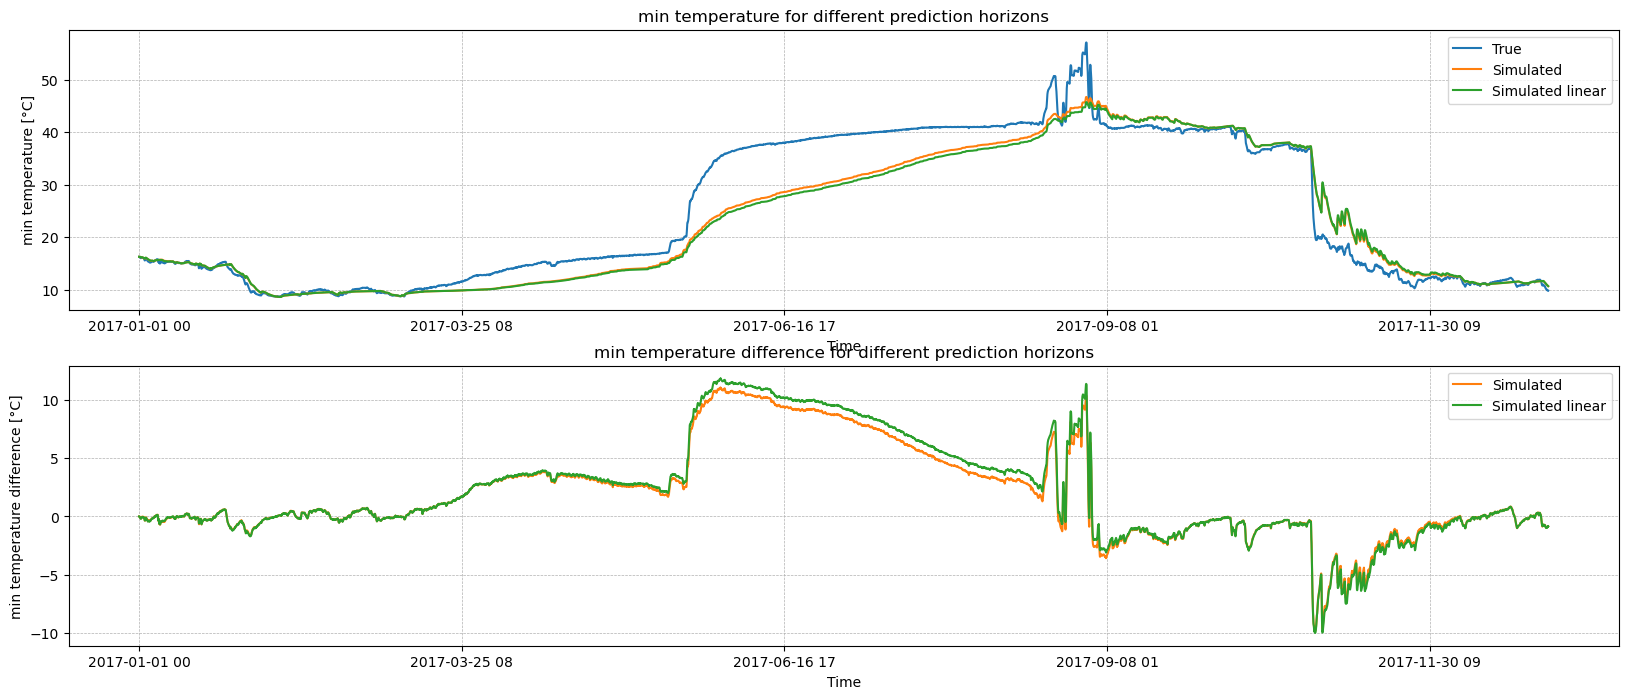

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,8))
water_sensors.min(axis=1).plot(ax=ax[0], label='True')
# p_1step.min(axis=1).plot(ax=ax, label='1 step ahead')
# p_24step.min(axis=1).plot(ax=ax, label='24 steps ahead')
# p_1week.min(axis=1).plot(ax=ax, label='1 week ahead')
# p_2week.min(axis=1).plot(ax=ax, label='2 weeks ahead')
sim.min(axis=1).plot(ax=ax[0], label='Simulated')
p1_sim_lin.min(axis=1).plot(ax=ax[0], label='Simulated linear')

ax[0].legend()
ax[0].set_ylabel('min temperature [°C]')
ax[0].set_xlabel('Time')
ax[0].set_title('min temperature for different prediction horizons')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);



(water_sensors.min(axis=1) - sim.min(axis=1)).plot(ax=ax[1], label='Simulated', color = 'C1')
(water_sensors.min(axis=1) - p1_sim_lin.min(axis=1)).plot(ax=ax[1], label='Simulated linear', color = 'C2')
ax[1].legend()
ax[1].set_ylabel('min temperature difference [°C]')
ax[1].set_xlabel('Time')
ax[1].set_title('min temperature difference for different prediction horizons')
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1);

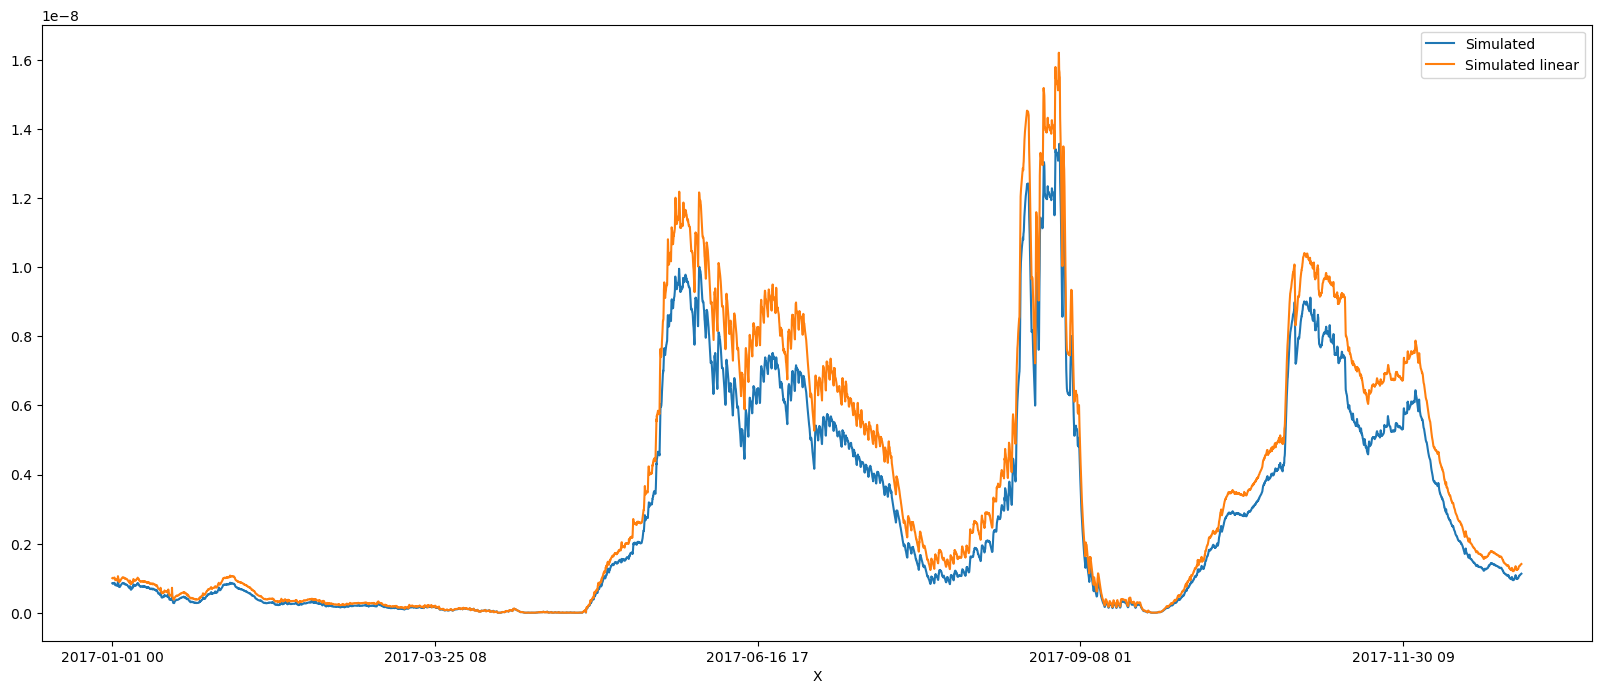

In [ ]:
from scipy.special import softmax



def kl_divergence(p, q):
    ''' Kullback-Leibler divergence between two probability distributions p and q (nomarlized)'''
    p = p / np.sum(p, axis = 0)
    q = q / np.sum(q, axis = 0)
    q1 = p.mean(axis = 0) / np.sum(p.mean(axis = 0))
   
    return (np.sum(p*np.log(p/q), axis = 1) / np.log(16))**2


fig, ax = plt.subplots(1,1,figsize=(20,8))
# kl_divergence(water_sensors, p_1step).plot(ax=ax, label='1 step ahead')

# kl_divergence(water_sensors, p_24step).plot(ax=ax, label='24 steps ahead')
# kl_divergence(water_sensors, p_1week).plot(ax=ax, label='1 week ahead')
# kl_divergence(water_sensors, p_2week).plot(ax=ax, label='2 weeks ahead')

kl_divergence(water_sensors, sim).plot(ax=ax, label='Simulated')
kl_divergence(water_sensors, p1_sim_lin).plot(ax=ax, label='Simulated linear')
ax.legend()